<a href="https://colab.research.google.com/github/AryanaBell/skills-introduction-to-github/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

connection = sqlite3.connect('superhero_db.sqlite')

print("Database created and connected!")

cursor = connection.cursor()

print("Cursor created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')

print("Heroes table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')

print("Villains table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villian_id INTEGER,
    outcome TEXT NOT NULL
)
''')

print("Battles table created!")

Database created and connected!
Cursor created!
Heroes table created!
Villains table created!
Battles table created!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [2]:
import pandas as pd

df_heroes = pd.read_csv('heroes.csv')

df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the heroes table.")

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

print("Heroes data:")
for row in rows:
    print(row)

df_villains = pd.read_csv('villains.csv')

df_villains.to_sql('villains', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the villains table.")

cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

print("Villains data:")
for row in rows:
    print(row)

df_battles = pd.read_csv('battles.csv')

df_battles.to_sql('battles', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the battles table.")

cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

print("Battles data:")
for row in rows:
    print(row)

Data from CSV has been inserted into the heroes table.
Heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
Data from CSV has been inserted into the villains table.
Villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Re

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [3]:
# Retrieve all superheroes and their powers
query_heroes_powers = "SELECT name, power FROM heroes"
df_heroes_powers = pd.read_sql_query(query_heroes_powers, connection)
print("Superheroes and their Powers:")
print(df_heroes_powers)

# Find all battles where the hero won
query_hero_wins = "SELECT * FROM battles WHERE outcome = 'Hero Wins'"
df_hero_wins = pd.read_sql_query(query_hero_wins, connection)
print("\nHero Wins:")
print(df_hero_wins)

# List all villains and their evil plans
query_villains = "SELECT name, evil_plan FROM villains"
df_villains = pd.read_sql_query(query_villains, connection)
print("\nVillains and their Evil Plans:")
print(df_villains)

# Determine which superhero has fought the most battles
query_hero_most_battles = """
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
LIMIT 1
"""
df_hero_most_battles = pd.read_sql_query(query_hero_most_battles, connection)
print("\nSuperhero with Most Battles:")
print(df_hero_most_battles)

Superheroes and their Powers:
             name               power
0      Spider-Man        Web-slinging
1        Iron Man       Powered Armor
2          Batman    Genius Detective
3        Superman      Super Strength
4            Thor      God of Thunder
5    Wonder Woman  Amazonian Strength
6   Black Panther    Enhanced Agility
7       The Flash         Super Speed
8            Hulk      Super Strength
9  Doctor Strange         Mystic Arts

Hero Wins:
   id  hero_id  villain_id    outcome
0   2        9           3  Hero Wins
1   5        1           7  Hero Wins
2   7        9           8  Hero Wins
3   8        3           2  Hero Wins
4   9        7           5  Hero Wins
5  13        8           9  Hero Wins
6  20        3           4  Hero Wins
7  29        3           5  Hero Wins
8  30        5           5  Hero Wins

Villains and their Evil Plans:
           name                           evil_plan
0  Green Goblin                  Terrorize New York
1        Thanos         

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [5]:
# Create the sidekicks table
connection.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    hero_id INTEGER NOT NULL,
    power TEXT,
    FOREIGN KEY(hero_id) REFERENCES heroes(id)
)
''')
print("Sidekicks table created!")

# Insert sample data into the sidekicks table
sidekick_data = [
    ('Ned', 1, 'Tech Support'),  # Spiderman has ID 3
    ('War Machine', 2, 'Armored Suit'),  # Iron Man has ID 2
    ('Robin', 3, 'Martial Arts'),  # Batman has ID 3
]
# Insert the data into the database
cursor.executemany('''
INSERT INTO sidekicks (name, hero_id, power)
VALUES (?, ?, ?)
''', sidekick_data)

connection.commit()
print("Sample sidekicks inserted!")

#Find all superheroes along with their sidekicks and their powers
query_hero_sidekicks = '''
SELECT heroes.name AS hero_name, sidekicks.name AS sidekick_name, sidekicks.power AS sidekick_power
FROM sidekicks
JOIN heroes ON sidekicks.hero_id = heroes.id
ORDER BY heroes.name;
'''

df_hero_sidekicks = pd.read_sql_query(query_hero_sidekicks, connection)
print("Superheroes and Their Sidekicks:")
print(df_hero_sidekicks)


Sidekicks table created!
Sample sidekicks inserted!
Superheroes and Their Sidekicks:
    hero_name sidekick_name sidekick_power
0      Batman         Robin   Martial Arts
1      Batman         Robin   Martial Arts
2    Iron Man   War Machine   Armored Suit
3    Iron Man   War Machine   Armored Suit
4  Spider-Man           Ned   Tech Support
5  Spider-Man           Ned   Tech Support


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

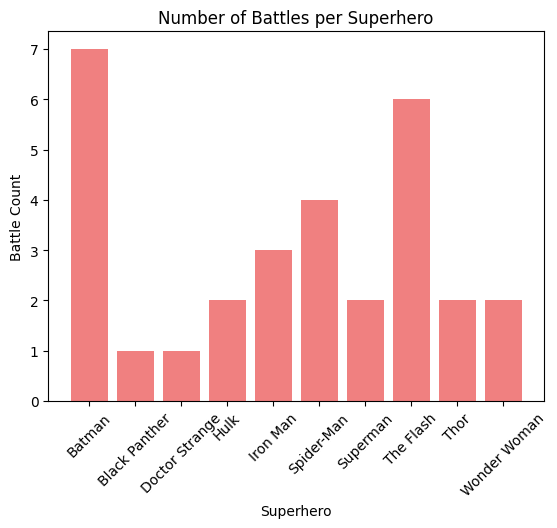

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Query to count the number of battles per superhero
query_battles_count = '''
SELECT heroes.name AS hero_name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
'''

# Load query results into a DataFrame
df_battles_count = pd.read_sql_query(query_battles_count, connection)

# Plot the bar chart
plt.bar(df_battles_count['hero_name'], df_battles_count['battle_count'], color='lightcoral')
plt.title('Number of Battles per Superhero')
plt.xlabel('Superhero')
plt.ylabel('Battle Count')
plt.xticks(rotation=45)
plt.show()

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!